In [1]:
# Imports e arquivos
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:\Users\Samsung\Desktop\Trabalho Despesas\DESPESAS_CEAPS-2008-2022.csv"
file = pd.read_csv(path, sep=';',low_memory=False)

In [2]:
# Transformando a coluna "VALOR_REEMBOLSADO" de string para float
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].astype(str)
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].str.replace(',','.')
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].str.replace('\r\n','')
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].astype(float)
    
# Removendo colunas desnecessárias para a atividade
df = file.drop(['CNPJ_CPF','FORNECEDOR','DOCUMENTO','DATA','DETALHAMENTO','COD_DOCUMENTO'],axis=1)
# Visualização do DataFrame atual e 
display(df) 
df.VALOR_REEMBOLSADO.describe()

,ANO,MES,SENADOR,TIPO_DESPESA,VALOR_REEMBOLSADO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",6000.00
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,1500.00
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,6000.00
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,1000.00
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,2000.00
...,...,...,...,...,...
317958,2008,11,WELLINGTON SALGADO DE OLIVEIRA,"Locomoção, hospedagem, alimentação, combustíve...",6152.97
317959,2008,12,WELLINGTON SALGADO DE OLIVEIRA,"Aluguel de imóveis para escritório político, c...",3818.87
317960,2008,12,WELLINGTON SALGADO DE OLIVEIRA,Aquisição de material de consumo para uso no e...,886.66
317961,2008,12,WELLINGTON SALGADO DE OLIVEIRA,"Contratação de consultorias, assessorias, pesq...",7070.00


count    3.179630e+05
mean     1.031730e+03
std      5.682034e+03
min     -1.500000e+03
25%      1.000000e+02
50%      2.835000e+02
75%      1.000000e+03
max      2.016557e+06
Name: VALOR_REEMBOLSADO, dtype: float64

In [3]:
# Função para remover itens repetidos das listas criadas a partir das colunas do DataFrame, sem perder a ordem original
def removeRepetidos(lista):
    visto = set()
    adicionar_visto = visto.add
    return [x for x in lista if not (x in visto or adicionar_visto(x))]

In [4]:
# Criando listas a partir das colunas do DataFrame
lista_ano = df['ANO'].tolist()
lista_mes = df['MES'].tolist()
lista_senadores = df['SENADOR'].tolist()
lista_tipo_despesa = df['TIPO_DESPESA'].tolist()
lista_gasto_medio_mes = []
lista_gasto_medio_despesa = []

# Descobrindo os gastos médios por mês
for mes in removeRepetidos(lista_mes):
    df_mes = df[df['MES']==mes]
    gasto_medio_mes = (df_mes['VALOR_REEMBOLSADO'].sum())/len(df_mes)
    lista_gasto_medio_mes.append(gasto_medio_mes)

# Descobrindo os gastos médios por tipo de despesa
for tipo_despesa in removeRepetidos(lista_tipo_despesa):
    df_despesa = df[df['TIPO_DESPESA']==tipo_despesa]
    gasto_medio_despesa = (df_despesa['VALOR_REEMBOLSADO'].sum())/len(df_despesa)
    lista_gasto_medio_despesa.append(gasto_medio_despesa)

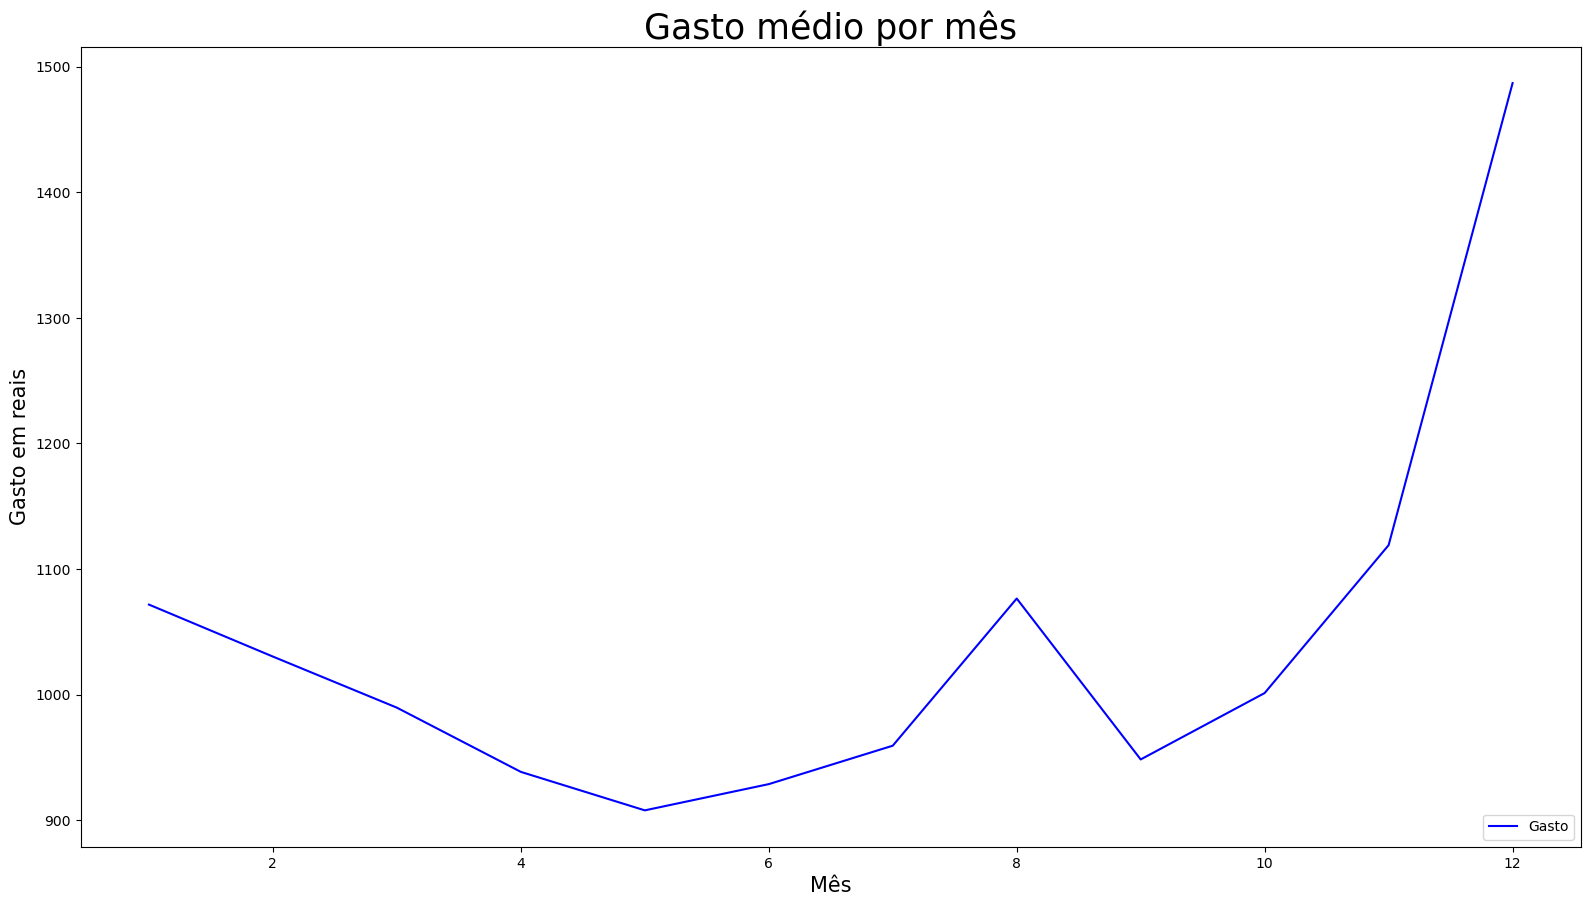

In [5]:
# Gráfico de gastos médios por mês
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(removeRepetidos(lista_mes),lista_gasto_medio_mes, color="blue")
eixo.set_title(("Gasto médio por mês"), fontsize=25)
eixo.set_ylabel("Gasto em reais", fontsize=15)
eixo.set_xlabel("Mês", fontsize=15)
eixo.legend(["Gasto"], loc='lower right', fontsize=10)

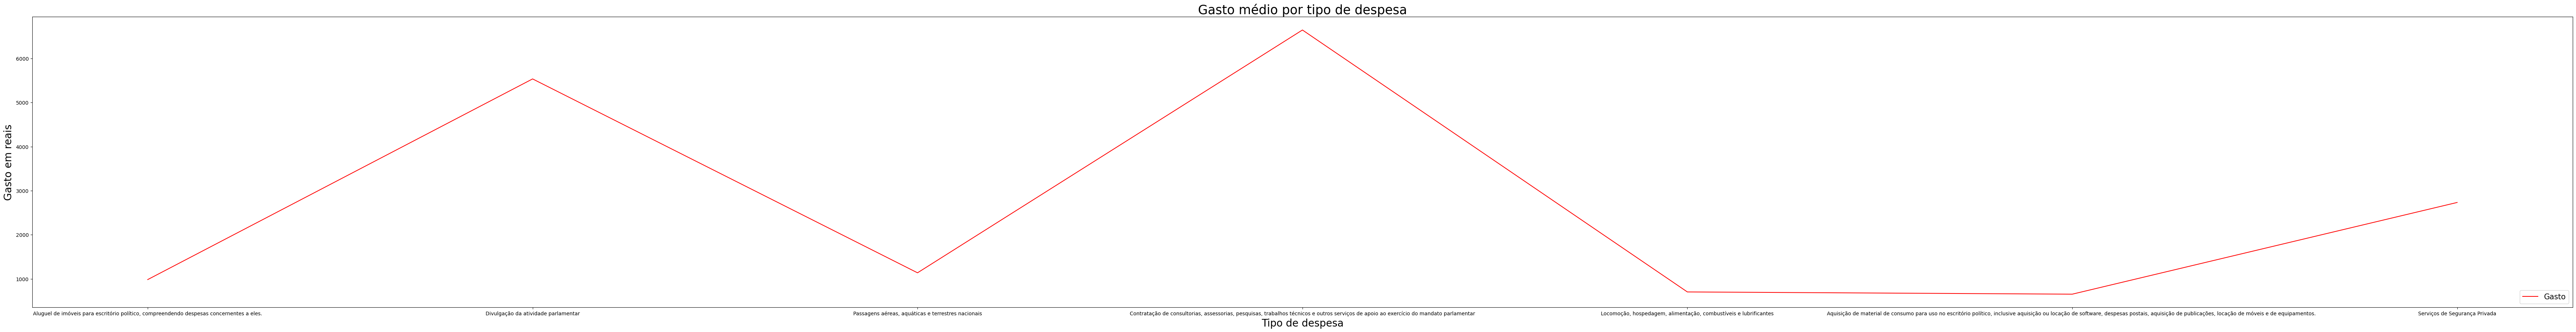

In [6]:
# Gráfico de gastos médios por tipo de despesa
fig = plt.figure(figsize=(70,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(removeRepetidos(lista_tipo_despesa),lista_gasto_medio_despesa, color='red')
eixo.set_title(("Gasto médio por tipo de despesa"), fontsize=25)
eixo.set_ylabel("Gasto em reais", fontsize=20)
eixo.set_xlabel("Tipo de despesa", fontsize=20)
eixo.legend(["Gasto"], loc='lower right', fontsize=15)

In [7]:
# Verificação das atividades que estão com o gasto acima da média
media_total_gastos = df['VALOR_REEMBOLSADO'].sum()/len(df)
print(media_total_gastos,"é a média total de gastos de todos os senadores, de 2008 à 2022")
print("\nOs gastos desses tipos estão acima da média:")
for j,k in zip(lista_gasto_medio_despesa,removeRepetidos(lista_tipo_despesa)):
    if j > media_total_gastos:
        print(k,"Com gasto médio de:",j)
print("\nOs gastos desses tipos estão abaixo da média:")
for j,k in zip(lista_gasto_medio_despesa,removeRepetidos(lista_tipo_despesa)):
    if j < media_total_gastos:
        print(k,"Com gasto médio de:",j)

1031.730441969663 é a média total de gastos de todos os senadores, de 2008 à 2022

Os gastos desses tipos estão acima da média:
Divulgação da atividade parlamentar Com gasto médio de: 5535.617819905213
Passagens aéreas, aquáticas e terrestres nacionais Com gasto médio de: 1136.6286942615238
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar Com gasto médio de: 6645.583072487644
Serviços de Segurança Privada Com gasto médio de: 2732.6379746835437

Os gastos desses tipos estão abaixo da média:
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles. Com gasto médio de: 982.4816809465523
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes Com gasto médio de: 702.5808932249323
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos

In [ ]:
# Os gastos dos senadores por ano e por tido de despesa e o desvio padrão para cada ano plotado
for ano in removeRepetidos(lista_ano):
    df_ano = df[df['ANO']==ano]
    lista_senadores_ano = df_ano['SENADOR'].tolist()
    for senador in removeRepetidos(lista_senadores_ano):
        lista_medias_despesas = []
        soma_medias = 0
        variancia = 0
        df_senadores_ano = df_ano[df_ano['SENADOR']==senador]
        lista_senadores_ano_despesa = df_senadores_ano['TIPO_DESPESA'].tolist()
        for tipo_despesa in removeRepetidos(lista_senadores_ano_despesa):
            df_senadores_ano_despesa = df_senadores_ano[df_senadores_ano['TIPO_DESPESA']==tipo_despesa]
            gasto_medio_senadores_ano_despesa = df_senadores_ano_despesa['VALOR_REEMBOLSADO'].sum()/len(df_senadores_ano_despesa)
            lista_medias_despesas.append(gasto_medio_senadores_ano_despesa)
            soma_medias += gasto_medio_senadores_ano_despesa
        media_anual_senador = soma_medias/len(lista_medias_despesas)
        for x in lista_medias_despesas:
            variancia += ((x-media_anual_senador)**2)/len(lista_medias_despesas)
        desvio_padrao = variancia**(1/2)

        fig = plt.figure(figsize=(15,8))
        eixo = fig.add_axes([0, 0, 1, 1])
        eixo.plot(removeRepetidos(lista_senadores_ano_despesa), lista_medias_despesas, color="black")
        eixo.set_title((r"Média dos gastos do(a) senador(a)",senador,"por tipo de despesa no ano de",ano,"e com Desvio Padrão de",desvio_padrao), fontsize=25)
        eixo.set_ylabel("Média de gastos", fontsize=15)
        eixo.set_xlabel("Tipo de despesa", fontsize=15)
        eixo.legend(["Gasto"], loc="lower right", fontsize=10)
